In [2]:
from env import user, host, password, get_db_url
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
import datetime
from pydataset import data 
from skimpy import clean_columns

In [3]:
data('iris', show_doc=True)
iris_db = data('iris')

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [4]:
# conducting data familiarization/exploration
iris_db.describe()
iris_db.info
iris_db.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [5]:
# i want to first start by cleaning the column names to 'snake_case' format 
# i've installed the 'skimpy' module and will use the 'clean_columns' method to clean the iris dataframe column names

iris_db = clean_columns(iris_db, case = 'snake')
iris_db.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

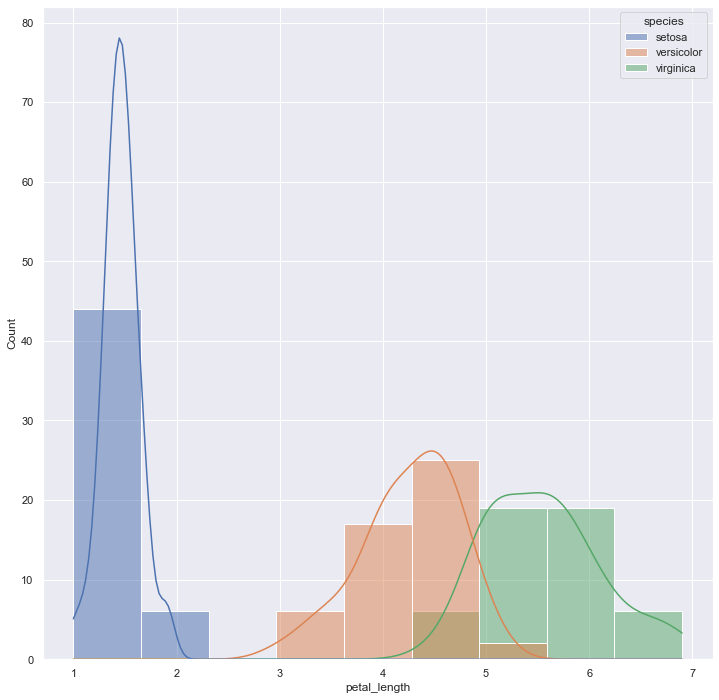

In [6]:
# 1. What does the distribution of petal lengths look like?
plt.figure(figsize= (12, 12)) 

sns.set_theme()
sns.histplot(data = iris_db, x = 'petal_length', kde=True, hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

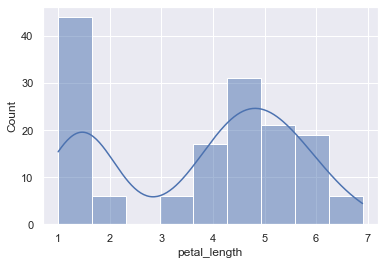

In [7]:
sns.histplot(data = iris_db, x = 'petal_length', kde=True)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

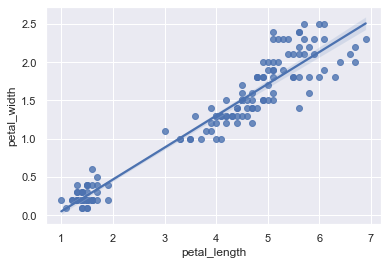

In [8]:
# 2. Is there a correlation between petal length and petal width? 
# Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns

# at a quick glance, there appears to be a (positive) correlation between petal_width and petal_length
# in other words, as the petal length increases, there's a good chance that the width of the petal will also increase
# the same can be said about the increase in petal width and increasing length

sns.regplot(x = 'petal_length', y = 'petal_width', data = iris_db)

# sns.set(rc ={'figure.figsize':(10, 10)})

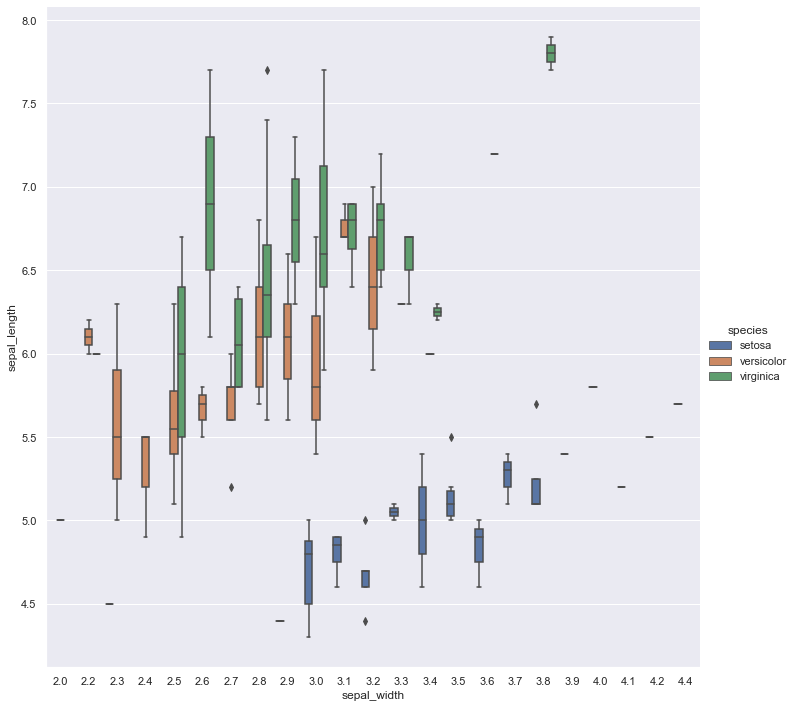

In [9]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length? 
# For this, you'll visualize two numeric columns through the lense of a categorical column

# yes, with more applied statistical methods one could potentially predict the correct flower species based on the sepal length and width 

sns.catplot(data=iris_db, x='sepal_width', y='sepal_length', hue='species', kind='box', height=10)

In [10]:
iris_db.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [11]:
# 4. Which features would be best used to predict species?

# petal length and petal width would be 

iris_db.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [12]:
labels = pd.Series(iris_db.columns)
labels = labels.drop(index=4)
labels

0    sepal_length
1     sepal_width
2    petal_length
3     petal_width
dtype: object

<AxesSubplot:>

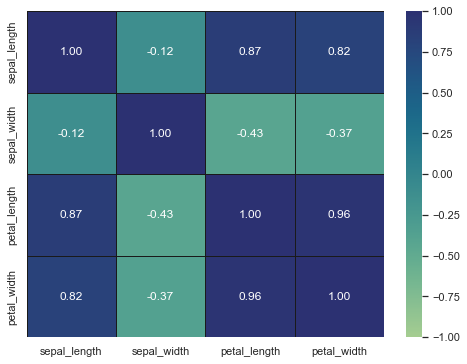

In [28]:
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(iris_db.corr(), cmap = 'crest', annot = True, fmt = '0.2f',
           vmin = -1, vmax = 1, center = 0,
           xticklabels = labels,
           yticklabels = labels, linewidth = 1, linecolor = 'k')

In [ ]:
# Excersises Part 2

# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
# What do you notice?

# the summary statistics for all four (4) unique datasets are similar (count, mean, std, quantiles)

anscombe_db = sns.load_dataset('anscombe')
anscombe_db.head()
anscombe_db.groupby('dataset').describe()


x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [ ]:
anscombe_db.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
# 1. continues

# Plot the x and y values from the anscombe data. 
# Each dataset should be in a separate column.


sns.scatterplot(anscombe_db, x='x', y='y')

ValueError: Could not interpret value `y` for parameter `y`